In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

## Data Exploration
In this step i have a look at some stats and get a feeling for the Data Set. Check the Data Types and possible values of columns. Check for Na´s. Get a feeling for what factors matter more by evaluation and visualisation of the results :)

In [3]:
df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [4]:
df.shape

(517754, 14)

In [5]:
df.dtypes

id                          int64
road_type                  object
num_lanes                   int64
curvature                 float64
speed_limit                 int64
lighting                   object
weather                    object
road_signs_present           bool
public_road                  bool
time_of_day                object
holiday                      bool
school_season                bool
num_reported_accidents      int64
accident_risk             float64
dtype: object

In [6]:
df.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970,0.352377
std,149462.849974,1.120434,0.272563,15.788521,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000,0.230000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000,0.340000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000,0.460000
max,517753.000000,4.000000,1.000000,70.000000,7.000000,1.000000


In [7]:
for column in df.columns:
    print(column)
    print(df[column].unique())

id
[     0      1      2 ... 517751 517752 517753]
road_type
['urban' 'rural' 'highway']
num_lanes
[2 4 1 3]
curvature
[0.06     0.99     0.63     0.07     0.58     0.54     0.04     0.33
 0.38     0.45     0.26     0.84     0.14     0.08     0.52     0.35
 0.68     0.72     0.86     0.17     0.16     0.41     0.49     0.39
 0.7      0.12     0.95     0.01     0.1      0.24     0.56     0.53
 0.29     0.73     0.67     0.6      0.57     0.42     0.75     0.61
 0.98     0.05     0.44     0.3907   0.31     0.83     0.46     0.23
 0.87     0.32     0.55     0.65     0.03     0.66     0.37     0.09
 0.13     0.76     0.28     1.       0.43     0.9      0.34     0.02
 0.64     0.79     0.47     0.71     0.36     0.78     0.82     0.18
 0.81     0.25     0.15     0.22     0.85     0.59     0.21     0.5
 0.51     0.92     0.77     0.74     0.27     0.2      0.62     0.19
 0.8      0.88     0.96     0.11     0.69     0.       0.97     0.4
 0.91     0.89     0.94     0.3      0.93     0.48     

In [8]:
df.isna().sum()

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

Now I check for the importance of multiple different factors:

## Holiday

In [9]:
holiday = df.groupby('holiday')['accident_risk'].mean()

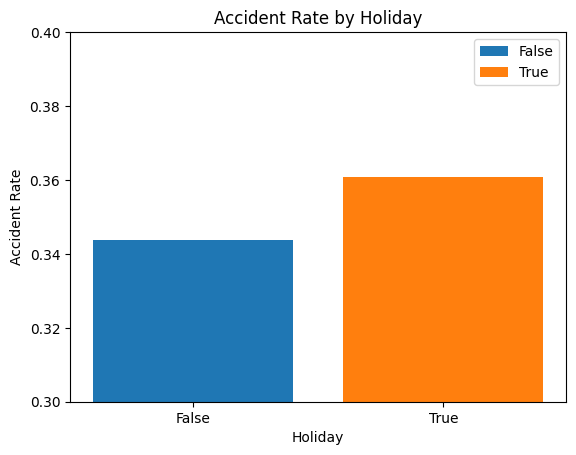

In [10]:
values = holiday.values
indices = holiday.index.astype(bool)
colors = [f"C{i}" for i in range(len(indices))]
plt.bar(indices, values, label = ["False", "True"], color = colors)
plt.xticks(indices, ["False", "True"])
plt.legend()
plt.ylim(0.3,0.4)
plt.title("Accident Rate by Holiday")
plt.ylabel("Accident Rate")
plt.xlabel("Holiday")
plt.show()

## Speed Limit

In [11]:
speed_limit = df.groupby('speed_limit')['accident_risk'].mean()

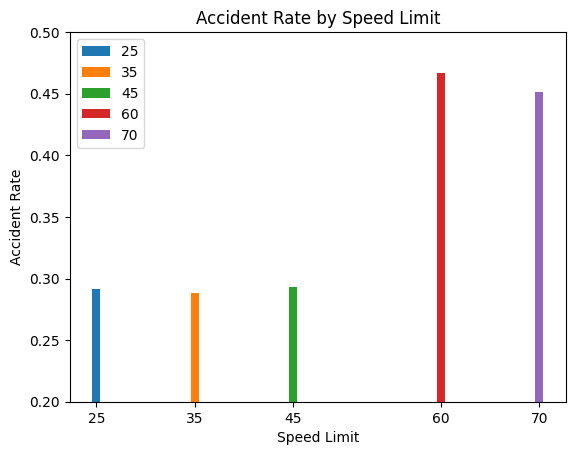

In [12]:
values = speed_limit.values
indices = speed_limit.index
colors = [f"C{i}" for i in range(len(indices))]
plt.bar(indices, values, label = indices, color = colors)
plt.legend()
plt.xticks(indices)
plt.ylim(0.2, 0.5)
plt.title("Accident Rate by Speed Limit")
plt.ylabel("Accident Rate")
plt.xlabel("Speed Limit")
plt.show()

## Road Type

In [13]:
road_type = df.groupby('road_type')['accident_risk'].mean()

In [14]:
df.groupby('road_type')['accident_risk'].describe()

,count,mean,std,min,25%,50%,75%,max
road_type,,,,,,,,
highway,173672.0,0.349734,0.165922,0.0,0.23,0.34,0.45,1.0
rural,172719.0,0.349997,0.167185,0.0,0.23,0.34,0.45,1.0
urban,171363.0,0.357456,0.166027,0.0,0.24,0.35,0.46,1.0


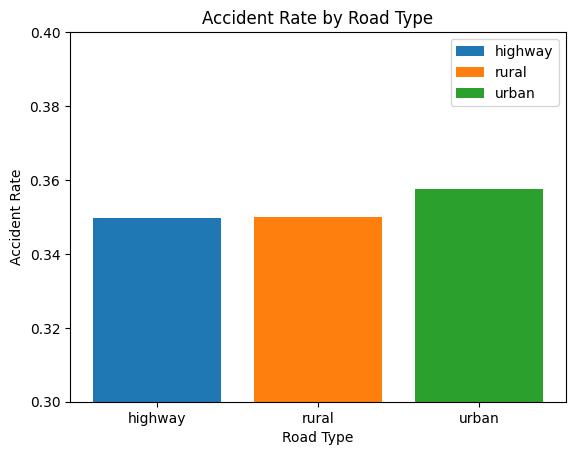

In [15]:
values = road_type.values
indices = road_type.index
colors = [f"C{i}" for i in range(len(indices))]
plt.bar(indices, values, label = indices, color = colors)
plt.legend()
plt.xticks(indices)
plt.ylim(0.3, 0.4)
plt.title("Accident Rate by Road Type")
plt.ylabel("Accident Rate")
plt.xlabel("Road Type")
plt.show()

## Number of Lanes

In [16]:
num_lanes = df.groupby('num_lanes')['accident_risk'].mean()

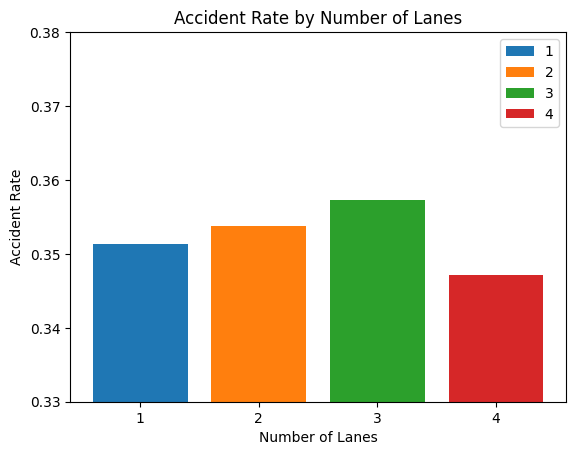

In [17]:
values = num_lanes.values
indices = num_lanes.index
colors = [f"C{i}" for i in range(len(indices))]
plt.bar(indices, values, label = indices, color = colors)
plt.legend()
plt.xticks(indices)
plt.ylim(0.33, 0.38)
plt.title("Accident Rate by Number of Lanes")
plt.ylabel("Accident Rate")
plt.xlabel("Number of Lanes")
plt.show()

## Curvature

In [18]:
curvature = df.groupby('curvature')['accident_risk'].mean()

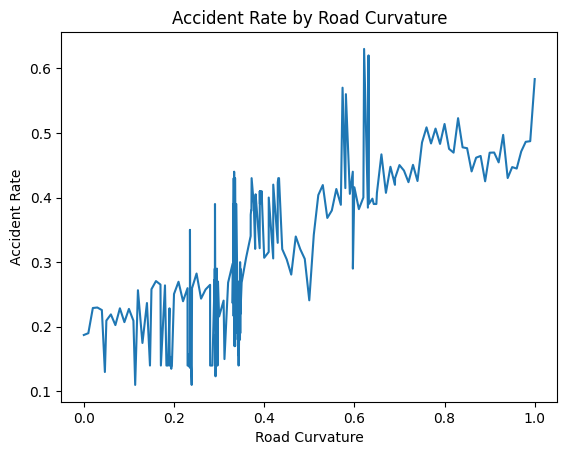

In [19]:
values = curvature.values
indices = curvature.index
colors = [f"C{i}" for i in range(len(indices))]
plt.plot(indices, values)
plt.ylim()
plt.title("Accident Rate by Road Curvature")
plt.ylabel("Accident Rate")
plt.xlabel("Road Curvature")
plt.show()

## Get Info about all Parameters

In [20]:
general_mean = df['accident_risk'].mean()

In [21]:
values_increase = []
indices_increase = []
values_decrease = []
indices_decrease = []

In [22]:
for column in df.columns:
    if column not in ["id", "accident_risk", "curvature"]:
        column_mean = df.groupby(column)['accident_risk'].mean()
        for index in column_mean.index:            
            if column_mean[index] > general_mean + 0.01:
                values_increase.append((column_mean[index]-general_mean)*100)
                indices_increase.append(f"{column} {index}")
            elif column_mean[index] < general_mean - 0.01:
                values_decrease.append((column_mean[index]-general_mean)*100)
                indices_decrease.append(f"{column} {index}")                

## Factors that increase Accident Risk

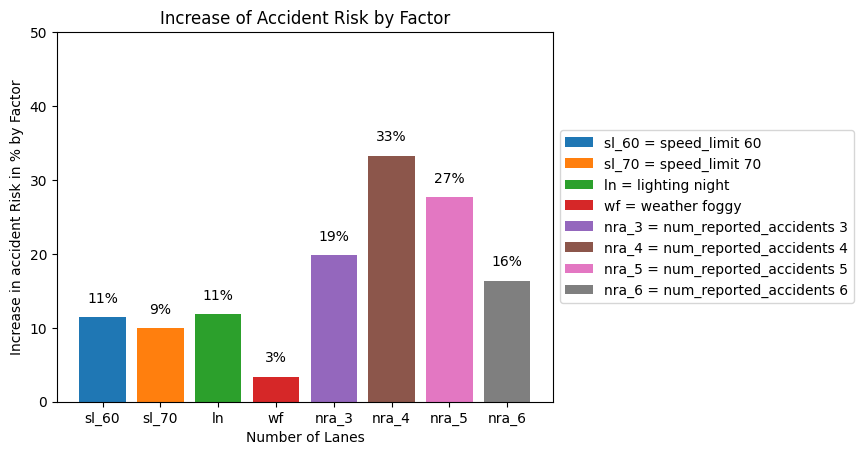

In [23]:
values = values_increase
indices = indices_increase
short_labels = ["sl_60", "sl_70", "ln", "wf", "nra_3", "nra_4", "nra_5", "nra_6"]
colors = [f"C{i}" for i in range(len(indices))]
plt.bar(indices, values, label = [f"{short_labels[i]} = {indices[i]}"for i in range(len(indices))], color = colors)
plt.legend()
plt.xticks(indices, short_labels)
plt.ylim(0, 50)
for i, v in enumerate(values):
    plt.text(i, v +2, f"{int(v)}%", ha="center")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.title("Increase of Accident Risk by Factor")
plt.ylabel("Increase in accident Risk in % by Factor")
plt.xlabel("Number of Lanes")
plt.show()

## Factors that Decrease the Accident Raisk

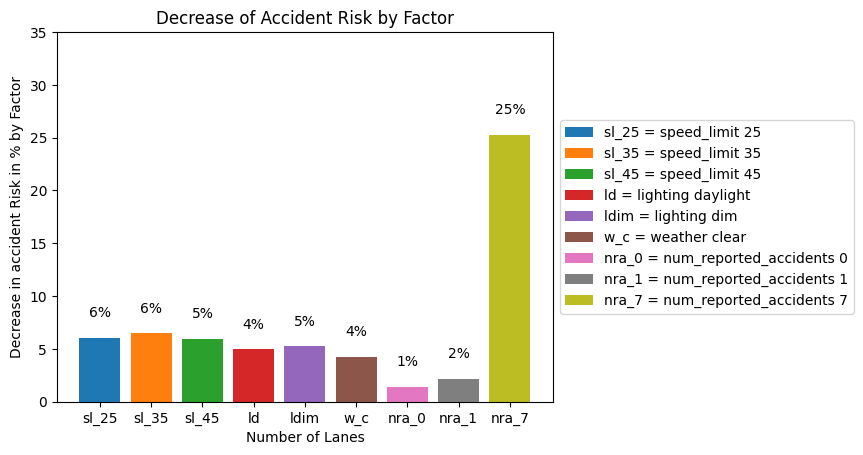

In [24]:
values = [-v for v in values_decrease]
indices = indices_decrease
short_labels = ["sl_25", "sl_35", "sl_45",  "ld", "ldim", "w_c","nra_0", "nra_1", "nra_7"]
labels = [f"{short_labels[i]} = {indices[i]}"for i in range(len(indices))]
colors = [f"C{i}" for i in range(len(indices))]
plt.bar(indices, values, label = labels, color = colors)
plt.xticks(indices, short_labels)
plt.ylim(0, 35)
for i, v in enumerate(values):
    plt.text(i, v +2, f"{int(v)}%", ha="center")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.title("Decrease of Accident Risk by Factor")
plt.ylabel("Decrease in accident Risk in % by Factor")
plt.xlabel("Number of Lanes")
plt.show()

# Testing Models

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Preprocessing Data

Since there are no missing values I will just split them in categories (categorical and numerical data) and then encode/scale them.

In [26]:
cat_columns = ['road_type', 'num_lanes', 'speed_limit', 'lighting',
       'weather', 'road_signs_present', 'public_road', 'time_of_day',
       'holiday', 'school_season', 'num_reported_accidents']
num_columns = ['curvature']
target_column = ['accident_risk']

In [27]:
encoder = OneHotEncoder()
target_encoder = StandardScaler()
scaler = StandardScaler()

In [28]:
encoder.fit(df[cat_columns])
scaler.fit(df[num_columns])
target_encoder.fit(df[target_column])

StandardScaler()

In [29]:
def encode_scale_data(cat_columns, num_columns):
    encoded_data = encoder.transform(df[cat_columns]).toarray()
    scaled_data = scaler.transform(df[num_columns])
    return np.hstack([encoded_data, scaled_data])

In [30]:
processed_data = encode_scale_data(cat_columns, num_columns)
target_data = target_encoder.transform(df[target_column])

In [31]:
# initialize models
lr_model = LinearRegression()
dtr_model = DecisionTreeRegressor()
rfr_model = RandomForestRegressor()
knr_model = KNeighborsRegressor()
gbr_model = GradientBoostingRegressor()

In [32]:
models = [lr_model, dtr_model, rfr_model, knr_model, gbr_model]

In [33]:
#train/test split
X_train, x_test, Y_train, y_test = train_test_split(processed_data, target_data, test_size = 0.2, random_state = 42)

In [34]:
accuracies = {}

In [35]:
#lr_model.fit(X_train, Y_train)
#prediction = model.predict(x_test)
#mse = mean_squared_error(y_test, prediction)
#accuracies[str(model).replace("()", "")] = mse

In [ ]:
#iterate over models

for model in models:
    print(f"Fitting Model: {model}")
    model.fit(X_train, Y_train)
    print("Creating Prediction...")
    prediction = model.predict(x_test)
    mse = mean_squared_error(y_test, prediction)
    print(f"{model} has MSE of: {mse}")
    accuracies[str(model).replace("()", "")] = mse

In [ ]:
#evaluate predictions of models

values = list(accuracies.values())
indices = list(accuracies.keys())
short_labels = ["LR","DTR", "RFR", "KNR", "GBR"]
labels = [f"{short_labels[i]} = {str(indices[i]).replace("()", "")}" for i  in range(len(short_labels))]
colors = [f"C{i}" for i in range(len(indices))]

plt.bar(short_labels, values, label = labels, color = colors)
plt.legend(bbox_to_anchor = (1, 0.5), loc = "center left")
#plt.xticks(indices, short_values)
plt.ylim(0.05, 0.3)
for i, v in enumerate(values):
    plt.text(i, v + 0.01, round(v, 2), ha="center")
plt.title("Mean Squared Error By Model")
plt.ylabel("Mean Squared Error")
plt.xlabel("Model")
plt.show()

In [ ]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "11"

In [ ]:
#print(f"working on {n}")
model = RandomForestRegressor(n_estimators = 100, n_jobs =11)
model.fit(X_train, Y_train.values.ravel())
prediction = model.predict(x_test)
mse = mean_squared_error(y_test, prediction)
print(f"MSE = {mse}")